# General Approach:
The approch used to solve this case study was a 3 step one:

1: Identify, understand and clearly state the business objective.

2: Collect the data. For this case study, data was already given so the only thing that was required was to download the data form Kaggle.

3: Look through the data and formulate questions that could be answered using this data by using data analysis tools. The answers to these quesitons should help make conclusions that bring us closer to achieving the business objective.

4: Use the data analysis tools to anwer the questions, generate insights and make visualizations that could be used to communicate those insights to the stakeholders.

The business objectve and the questions formulated in step 1 and 3 respectively are given next. Then the python code used to complete step 4 is given. 

# Business Objective
Monitor trends in public data from fitness devices and talk about how these trends could influence Bellabeat's maketing or product development strategy for Time (Bellabeat's Fitness Watch).

# Questions to answer:
Q1: How many people are using the watch to track weight?  

Q2: Of the people using the watch to track weight, how many are obese? Use caloric information to check if the watch might be helping these people get in a calorie deficit?  

Q3: Is the watch helping people eat the right amount of calories? 

Q4: How many are using to track sleep? 

Q5: Are people's sleep patterns improving due to it?  

Q6: What are the intensity values in the minuteIntensitiesNarrow_merged csv file. Use range to figure out what each intensity indicates? 

Q7: Use these intensities to understand what percentage of people are using the watch to only track their high intensity actiivties and what percentage are wearing it for all kinds of activities? 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# List all directories in the current folder
directories = [d for d in os.listdir('.') if os.path.isdir(d)]

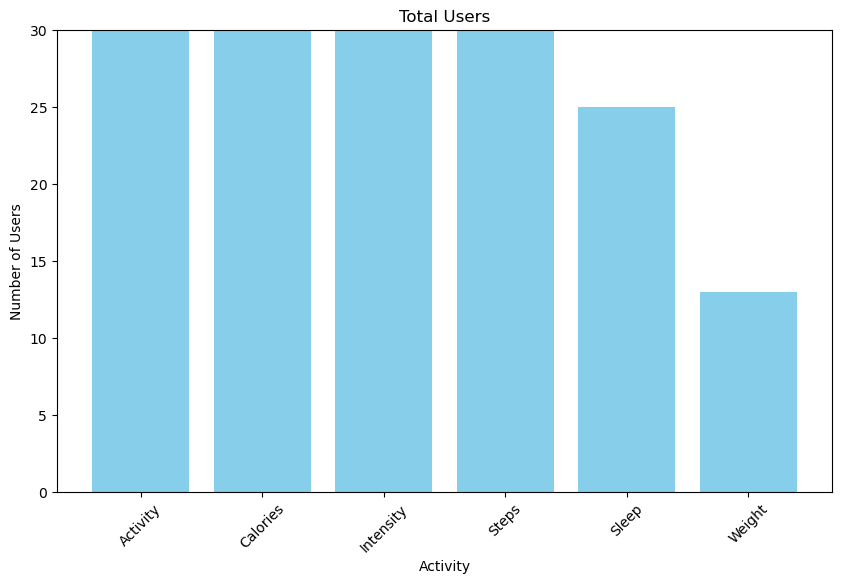

In [3]:


# Function to count unique users in each activity file
def count_unique_users(directory):
    activity_files = {
        'Activity': 'dailyActivity_merged.csv',
        'Calories': 'hourlyCalories_merged.csv',
        'Intensity': 'hourlyIntensities_merged.csv',
        'Steps': 'hourlySteps_merged.csv',
        'Sleep': 'minuteSleep_merged.csv',
        'Weight': 'weightLogInfo_merged.csv'
    }
    
    unique_users = {}
    
    for activity, filename in activity_files.items():
        file_path = os.path.join(directory, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            if activity not in unique_users:
                unique_users[activity] = set(df['Id'].unique())
            else:
                unique_users[activity].update(df['Id'].unique())
    
    return unique_users

# Initialize a dictionary to accumulate unique user counts across all directories
total_unique_users = {}

# Iterate over directories and accumulate unique user counts
for directory in directories:
    unique_users = count_unique_users(directory)
    
    for activity, users in unique_users.items():
        if activity not in total_unique_users:
            total_unique_users[activity] = users
        else:
            total_unique_users[activity].update(users)

# Convert the accumulated unique user counts to a DataFrame for plotting
df_plot = pd.DataFrame({
    'Activity': list(total_unique_users.keys()),
    'Users': [len(users) for users in total_unique_users.values()]
})

# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_plot['Activity'], df_plot['Users'], color='skyblue')
plt.title('Total Users')
plt.xlabel('Activity')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.ylim(0, 30)  # Set y-axis limit to 30
plt.show()

C:\Users\tahaa\AppData\Local\Temp\ipykernel_27584\3917852498.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight_df['Date'] = pd.to_datetime(weight_df['Date'])
C:\Users\tahaa\AppData\Local\Temp\ipykernel_27584\3917852498.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'])


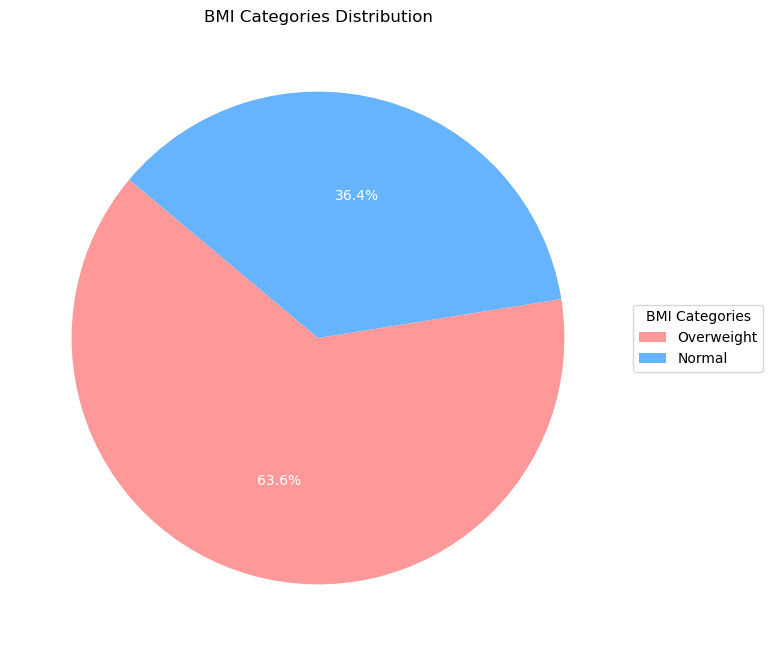

C:\Users\tahaa\AppData\Local\Temp\ipykernel_27584\3917852498.py:99: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight_df['Date'] = pd.to_datetime(weight_df['Date'])
C:\Users\tahaa\AppData\Local\Temp\ipykernel_27584\3917852498.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'])


Percentage of people who succeeded in the first month and then also succeeded in the second month: 0.0%


In [4]:
def analyze_weight_and_calories():
    # Define file paths for the first directory
    directory = directories[0]
    weight_file = os.path.join(directory, 'weightLogInfo_merged.csv')
    calories_file = os.path.join(directory, 'hourlyCalories_merged.csv')
    
    # Check if files exist
    if not os.path.exists(weight_file) or not os.path.exists(calories_file):
        raise FileNotFoundError("Required files not found in the directory")
    
    # Load weight data
    weight_df = pd.read_csv(weight_file)
    weight_df['Date'] = pd.to_datetime(weight_df['Date'])
    
    # Get earliest entry for each unique user
    earliest_weight_df = weight_df.loc[weight_df.groupby('Id')['Date'].idxmin()]
    
    # Classify BMI
    def classify_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi <= 24.9:
            return 'Normal'
        else:
            return 'Overweight'
    
    earliest_weight_df['BMI_Category'] = earliest_weight_df['BMI'].apply(classify_bmi)
    
    # Load calories data
    calories_df = pd.read_csv(calories_file)
    calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'])
    
    # Initialize results list
    results = []
    
    # Analyze each user
    for user_id in earliest_weight_df['Id'].unique():
        user_weight_info = earliest_weight_df[earliest_weight_df['Id'] == user_id]
        user_calories = calories_df[calories_df['Id'] == user_id].sort_values(by='ActivityHour')
        
        # Handle odd number of entries by removing the midpoint
        if len(user_calories) % 2 != 0:
            mid_point = len(user_calories) // 2
            user_calories = user_calories.drop(user_calories.index[mid_point])
        
        # Split data into two halves
        mid_point = len(user_calories) // 2
        first_half = user_calories.iloc[:mid_point]
        second_half = user_calories.iloc[mid_point:]
        
        # Sum calories burned in each half
        first_half_calories = first_half['Calories'].sum()
        second_half_calories = second_half['Calories'].sum()
        
        # Determine success
        bmi_category = user_weight_info['BMI_Category'].values[0]
        success = False
        
        if bmi_category == 'Underweight':
            success = first_half_calories + 200 < second_half_calories
        elif bmi_category == 'Normal':
            success = abs(first_half_calories - second_half_calories) <= 200
        elif bmi_category == 'Overweight':
            success = second_half_calories + 200 < first_half_calories 
        
        # Append result
        results.append({
            'Id': user_id,
            'BMI_Category': bmi_category,
            'First_Half_Calories': first_half_calories,
            'Second_Half_Calories': second_half_calories,
            'Success': success
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot pie chart for BMI categories
    bmi_counts = results_df['BMI_Category'].value_counts()
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99'], textprops=dict(color="w")
    )
    
    # Add legend
    plt.legend(wedges, bmi_counts.index, title="BMI Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.title('BMI Categories Distribution')
    plt.show()
    
    # Analyze the second month
    directory = directories[1]
    weight_file = os.path.join(directory, 'weightLogInfo_merged.csv')
    calories_file = os.path.join(directory, 'hourlyCalories_merged.csv')
    
    # Load weight data
    weight_df = pd.read_csv(weight_file)
    weight_df['Date'] = pd.to_datetime(weight_df['Date'])
    
    # Load calories data
    calories_df = pd.read_csv(calories_file)
    calories_df['ActivityHour'] = pd.to_datetime(calories_df['ActivityHour'])
    
    #Narrow down to only the users that were successful in the first month
    successful_users = weight_df[weight_df['Id'].isin(results_df[results_df['Success']]['Id'])]
    successful_earlest_weight = successful_users.loc[successful_users.groupby('Id')['Date'].idxmin()]
    successful_earlest_weight['BMI_Category'] = successful_earlest_weight['BMI'].apply(classify_bmi)

    calories_df = calories_df[calories_df['Id'].isin(successful_earlest_weight['Id'])]

    # Initialize results list for the second month
    results_second_month = []
    
    # Analyze each user
    for user_id in successful_earlest_weight['Id'].unique():
        user_weight_info = successful_earlest_weight[successful_earlest_weight['Id'] == user_id]
        user_calories = calories_df[calories_df['Id'] == user_id].sort_values(by='ActivityHour')
        
        # Handle odd number of entries by removing the midpoint
        if len(user_calories) % 2 != 0:
            mid_point = len(user_calories) // 2
            user_calories = user_calories.drop(user_calories.index[mid_point])
        
        # Split data into two halves
        mid_point = len(user_calories) // 2
        first_half = user_calories.iloc[:mid_point]
        second_half = user_calories.iloc[mid_point:]
        
        # Sum calories burned in each half
        first_half_calories = first_half['Calories'].sum()
        second_half_calories = second_half['Calories'].sum()
        
        # Determine success
        bmi_category = user_weight_info['BMI_Category'].values[0]
        success = False
        
        if bmi_category == 'Underweight':
            success = first_half_calories + 200 < second_half_calories
        elif bmi_category == 'Normal':
            success = abs(first_half_calories - second_half_calories) <= 200
        elif bmi_category == 'Overweight':
            success = second_half_calories + 200 < first_half_calories 
        
        # Append result
        results_second_month.append({
            'Id': user_id,
            'BMI_Category': bmi_category,
            'First_Half_Calories': first_half_calories,
            'Second_Half_Calories': second_half_calories,
            'Success': success
        })
    
    # Convert results to DataFrame for the second month
    results_df_second_month = pd.DataFrame(results_second_month)

    #People who succeeded in both months
    consistent_success_ids = set(results_df_second_month[results_df_second_month['Success']==True]['Id'])

    first_month_success_ids = set(results_df[results_df['Success']==True]['Id'])
    consistent_success_percentage = (len(consistent_success_ids) / len(first_month_success_ids)) * 100
    
    # Output the percentage of people who succeeded in the first month and then also succeeded in the second month
    print(f"Percentage of people who succeeded in the first month and then also succeeded in the second month: {consistent_success_percentage}%")
    
    return results_df

df = analyze_weight_and_calories()

2016-03-11 21:19:30
2016-04-12 08:35:00


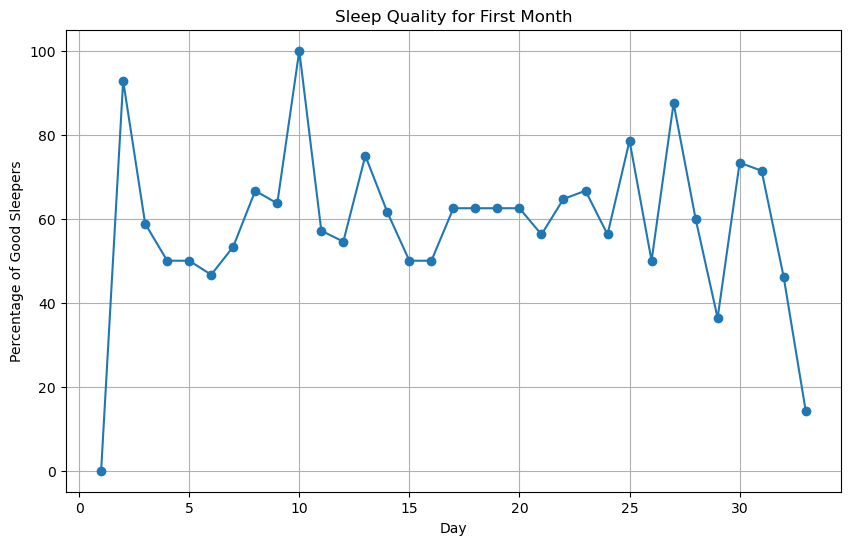

Percentage of people whose sleep quality improved: 43.47826086956522%
Percentage of people whose sleep quality did not improve: 56.52173913043478%
2016-04-11 20:48:00
2016-05-12 09:56:00


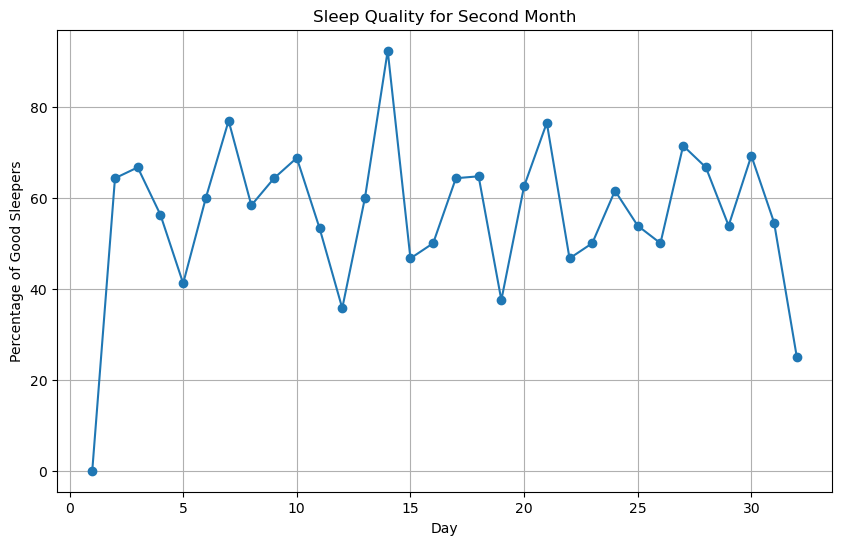

Percentage of people whose sleep quality improved: 45.83333333333333%
Percentage of people whose sleep quality did not improve: 54.16666666666667%


In [5]:
def analyze_sleep_quality(directory, title):
    # Define file path
    sleep_file = os.path.join(directory, 'minuteSleep_merged.csv')
    
    # Check if file exists
    if not os.path.exists(sleep_file):
        raise FileNotFoundError("Sleep file not found in the directory")
    
    # Load sleep data
    sleep_df = pd.read_csv(sleep_file)
    sleep_df['date'] = pd.to_datetime(sleep_df['date'])
    print(sleep_df['date'].min())
    print(sleep_df['date'].max())
    sleep_df['date'] = sleep_df['date'].dt.date
    
    # Calculate sleep minutes per day per user
    sleep_minutes = sleep_df.groupby(['Id', 'date']).size().reset_index(name='SleepMinutes')

    # Classify sleep quality
    sleep_minutes['SleepQuality'] = sleep_minutes['SleepMinutes'].apply(lambda x: 0 if x < 420 else 1)
    
    # Calculate percentage of people with sleep quality 1 each day
    daily_sleep_quality = sleep_minutes.groupby('date').agg(
        total_users=('Id', 'nunique'),
        good_sleepers=('SleepQuality', 'sum')
    ).reset_index()
    daily_sleep_quality['Percentage'] = (daily_sleep_quality['good_sleepers'] / daily_sleep_quality['total_users']) * 100
    
    # Plot the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(daily_sleep_quality) + 1), daily_sleep_quality['Percentage'], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('Percentage of Good Sleepers')
    plt.grid(True)
    plt.show()
    
    # Analyze each user
    results = []
    for user_id in sleep_minutes['Id'].unique():
        user_sleep_data = sleep_minutes[sleep_minutes['Id'] == user_id].sort_values(by='date')
        
        # Handle odd number of entries by removing the midpoint
        if len(user_sleep_data) % 2 != 0:
            mid_point = len(user_sleep_data) // 2
            user_sleep_data = user_sleep_data.drop(user_sleep_data.index[mid_point])
        
        # Split data into two halves
        mid_point = len(user_sleep_data) // 2
        first_half = user_sleep_data.iloc[:mid_point]
        second_half = user_sleep_data.iloc[mid_point:]
        
        # Calculate average sleep quality in each half
        first_half_quality = first_half['SleepQuality'].mean()
        second_half_quality = second_half['SleepQuality'].mean()
        
        # Determine improvement
        improvement = second_half_quality > first_half_quality
        
        # Append result
        results.append({
            'Id': user_id,
            'Improvement': improvement
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Calculate percentages
    improved_percentage = (results_df['Improvement'].sum() / len(results_df)) * 100
    not_improved_percentage = 100 - improved_percentage
    
    return improved_percentage, not_improved_percentage

# Example usage
improved_percentage, not_improved_percentage = analyze_sleep_quality(directories[0],'Sleep Quality for First Month')
print(f"Percentage of people whose sleep quality improved: {improved_percentage}%")
print(f"Percentage of people whose sleep quality did not improve: {not_improved_percentage}%")
improved_percentage, not_improved_percentage = analyze_sleep_quality(directories[1],'Sleep Quality for Second Month')
print(f"Percentage of people whose sleep quality improved: {improved_percentage}%")
print(f"Percentage of people whose sleep quality did not improve: {not_improved_percentage}%")

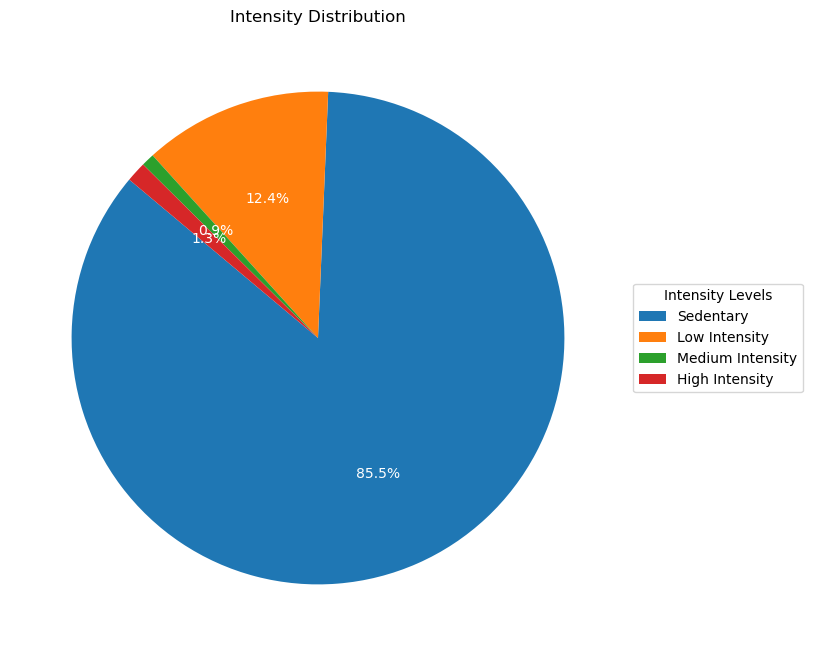

In [6]:
def plot_intensity_distribution(directory):
    # Define file path
    intensities_file = os.path.join(directory, 'minuteIntensitiesNarrow_merged.csv')
    
    # Check if file exists
    if not os.path.exists(intensities_file):
        raise FileNotFoundError("Intensity file not found in the directory")
    
    # Load intensity data
    intensity_df = pd.read_csv(intensities_file)
    
    # Calculate proportions
    proportions = intensity_df['Intensity'].value_counts(normalize=True)
    
    # Ensure all intensity levels are present
    for i in range(4):
        if i not in proportions:
            proportions[i] = 0
    
    # Sort proportions by intensity level
    proportions = proportions.sort_index()
    
    # Define labels and colors
    labels = ['Sedentary', 'Low Intensity', 'Medium Intensity', 'High Intensity']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Best practice colors
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(proportions, colors=colors, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))
    
    # Add legend
    plt.legend(wedges, labels, title="Intensity Levels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.title('Intensity Distribution')
    plt.show()

# Example usage
plot_intensity_distribution(directories[0])

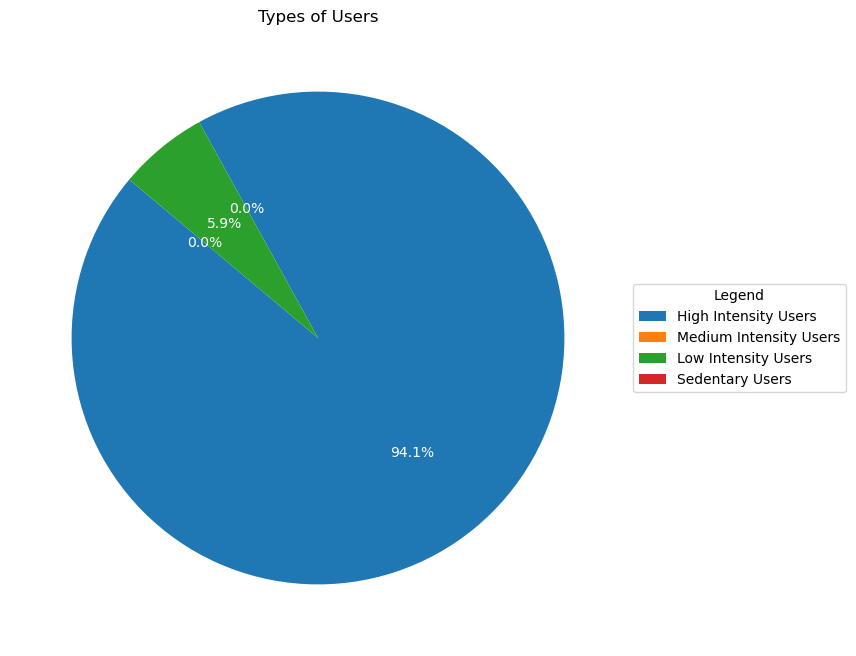

In [7]:
def plot_intensity_percentages(directory):
    # Define file path
    intensities_file = os.path.join(directory, 'minuteIntensitiesNarrow_merged.csv')
    
    # Check if file exists
    if not os.path.exists(intensities_file):
        raise FileNotFoundError("Intensity file not found in the directory")
    
    # Load intensity data
    intensity_df = pd.read_csv(intensities_file)
    
    # Get total unique users
    total_users = set(intensity_df['Id'].unique())
    
    # Identify high intensity users
    high_intensity_users = set(intensity_df[intensity_df['Intensity'] == 3]['Id'].unique())
    
    # Identify medium intensity users
    medium_intensity_users = set(intensity_df[intensity_df['Intensity'] == 2]['Id'].unique()) - high_intensity_users
    
    # Identify low intensity users
    low_intensity_users = set(intensity_df[intensity_df['Intensity'] == 1]['Id'].unique()) - high_intensity_users - medium_intensity_users
    
    # Identify sedentary users
    sedentary_users = total_users - high_intensity_users - medium_intensity_users - low_intensity_users
    
    # Calculate percentages
    high_intensity_percentage = (len(high_intensity_users) / len(total_users)) * 100
    medium_intensity_percentage = (len(medium_intensity_users) / len(total_users)) * 100
    low_intensity_percentage = (len(low_intensity_users) / len(total_users)) * 100
    sedentary_percentage = (len(sedentary_users) / len(total_users)) * 100
    
    # Define labels and sizes
    labels = ['High Intensity Users', 'Medium Intensity Users', 'Low Intensity Users', 'Sedentary Users']
    sizes = [high_intensity_percentage, medium_intensity_percentage, low_intensity_percentage, sedentary_percentage]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Best practice colors
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))
    
    # Add legend
    plt.legend(wedges, labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.title('Types of Users')
    plt.show()

# Example usage
plot_intensity_percentages(directories[0])


C:\Users\tahaa\AppData\Local\Temp\ipykernel_27584\1995340262.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intensity_df['ActivityMinute'] = pd.to_datetime(intensity_df['ActivityMinute'])


Total Users: 14
Users with Anomalies: 13


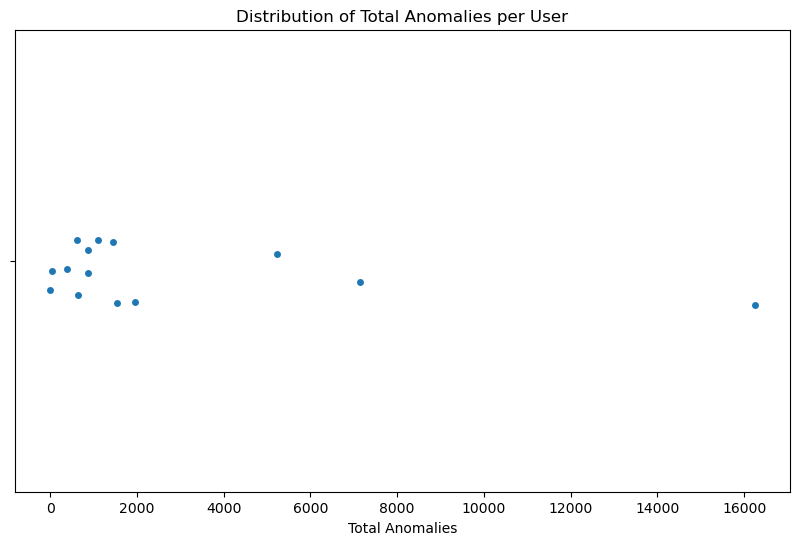

Percentage of users with anomalies: 92.85714285714286%


In [8]:

def detect_heart_rate_anomalies(hr_file, intensity_file, low_hr_threshold_0, high_hr_threshold_0, low_hr_threshold_3, high_hr_threshold_3):
    # Load heart rate data
    hr_df = pd.read_csv(hr_file)
    hr_df['Time'] = pd.to_datetime(hr_df['Time'])
    
    # Load intensity data
    intensity_df = pd.read_csv(intensity_file)
    intensity_df['ActivityMinute'] = pd.to_datetime(intensity_df['ActivityMinute'])
    
    # Filter IDs present in both files
    common_ids = set(hr_df['Id']).intersection(set(intensity_df['Id']))
    hr_df = hr_df[hr_df['Id'].isin(common_ids)]
    intensity_df = intensity_df[intensity_df['Id'].isin(common_ids)]
    
    # Initialize anomaly count
    anomaly_count = {user_id: 0 for user_id in common_ids}
    
    # Check for anomalies
    for user_id in common_ids:
        user_hr = hr_df[hr_df['Id'] == user_id]
        user_intensity = intensity_df[intensity_df['Id'] == user_id]
        
        for _, intensity_row in user_intensity.iterrows():
            start_time = intensity_row['ActivityMinute'] - pd.Timedelta(minutes=1)
            end_time = intensity_row['ActivityMinute']
            intensity = intensity_row['Intensity']
            
            hr_subset = user_hr[(user_hr['Time'] > start_time) & (user_hr['Time'] <= end_time)]
            
            for _, hr_row in hr_subset.iterrows():
                hr = hr_row['Value']
                
                if intensity == 0 and (hr < low_hr_threshold_0 or hr > high_hr_threshold_0):
                    anomaly_count[user_id] += 1
                elif intensity == 3 and (hr < low_hr_threshold_3 or hr > high_hr_threshold_3):
                    anomaly_count[user_id] += 1
    
    # Calculate percentage of users with anomalies
    users_with_anomalies = sum(1 for count in anomaly_count.values() if count > 0)
    percentage_with_anomalies = (users_with_anomalies / len(common_ids)) * 100
    print("Total Users:", len(common_ids))
    print("Users with Anomalies:", users_with_anomalies)
    
    # Plot strip plot of anomalies
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=list(anomaly_count.values()), jitter=True)
    plt.title('Distribution of Total Anomalies per User')
    plt.xlabel('Total Anomalies')
    plt.show()
    
    return percentage_with_anomalies

# Example usage
hr_file = os.path.join(directories[0], 'heartrate_seconds_merged.csv')
intensity_file = os.path.join(directories[0], 'minuteIntensitiesNarrow_merged.csv')
percentage_with_anomalies = detect_heart_rate_anomalies(hr_file, intensity_file, 50, 100, 110, 180)
print(f"Percentage of users with anomalies: {percentage_with_anomalies}%")
